<a href="https://colab.research.google.com/github/ch00226855/CMP414765Spring2021/blob/main/Week08_SupportVectorMachine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 8
# Linear Support Vector Machines

**Reading:** Textbook, Chapter 5.

*Support Vector Machine* (SVM) is one of the most popular models in Machine Learning. It is capable of performing linear or nonlinear classification, regression, and even outlier detection. This lecture will explain the core concepts of SVMs, how to use them, and how they work.

## Task 1: Linear SVM with Hard Margin
- Each data example has two features: $x_1$ and $x_2$. Using them as coordinates, they can be visualized as a data point on the coordinate plane.
- Binary classification: target value $y = 1$ means that the instance belongs to **Class 1 (the positive class)**; $y = -1$ means that the instance belongs to **Class -1 (the negative class)**.
- Classes are **linearly separable**: The two classes can clearly be separrated with a straight line.
- The **goal** is to find a straight line that best separates the two classes. No mis-classification is allowed.
- The **best straight line** that separates the two classes is the one with maximized distance from it to the nearest data point on each class.

<img src="https://github.com/ch00226855/CMP464-788-Spring2019/raw/master/Data/SVM1.png">

In the above graph, there are three lines (H1, H2, H3) that try to separate black dots from white dots.
- H1 is clearly bad because it doesn't even separate the two classes properly.
- H2 separates the two classes perfectly, but it is so close to the data points that it will probably not perform well on new instances.
- H3 not only separates the two classes but also stays as far away from the closest training instances as possible. It is reasonable to believe that H3 will generalize well on new instances.

<img src="https://github.com/ch00226855/CMP464-788-Spring2019/raw/master/Data/SVM2.jpeg">

Notice that adding more training examples "off the street" will not affect the decision boundary at all: it is fully determined (or "supported") by the points located on the edge of the street. These instances are called the **support vectors**.

SVMs are sensitive to the feature scales, so proper feature scaling is necessary for obtaining a good decision boundary.

## Express an SVM model with three parallel lines

We can use three lines to expression the above binary classifier:

- $w_1x_1 + w_2x_2 + b = 0$ represents the line in the middle of the gap.
- $w_1x_1 + w_2x_2 + b = 1$ represents one boundary of the gap.
- $w_1x_1 + w_2x_2 + b = -1$ represents the other boundary of the gap.

The parameters of this model are $w_1(\ge 0), w_2, b$. To avoid ambiguity, we choose $w_1$ to be non-negative. Here all three lines share the same slope $w$ because they are parallel. 

- For any point $(x_1, x_2)$ on the right half plane divided by the central line, the expression $w_1x_1 + w_2x_2 + b$ is positive.
- For any point $(x_1, x_2)$ on the left half plane, $w_1x_1 + w_2x_2 + b$ is negative.

**Question**: What is the slope of these lines?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

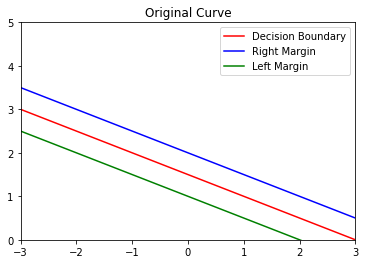

In [6]:
# Suppose w1 = 1, w2 = 2, and b = -3, draw the above
# three lines on a graph.
w1, w2, b = 1, 2, -3
x1_coordinates = np.array([-5, 5])

# plot w1 * x1 + w2 * x2 + b = 0
x2_coordinates = (-w1/w2) * x1_coordinates - b / w2
plt.plot(x1_coordinates, x2_coordinates, 'r', label="Decision Boundary")

# plot w1 * x1 + w2 *x2 + b = 1
x2_coordinates = (-w1 * x1_coordinates - b + 1) / w2
plt.plot(x1_coordinates, x2_coordinates, 'b', label="Right Margin")

# plot w1 * x1 + w2 *x2 + b = -1
x2_coordinates = (-w1 * x1_coordinates - b - 1) / w2
plt.plot(x1_coordinates, x2_coordinates, 'g', label="Left Margin")

plt.xlim([-3, 3])
plt.ylim([0, 5])
plt.title("Original Curve")
plt.legend()

## Linear SVM: Decision function and predictions

The linear SVM classifier model predicts the class of a new instance $(x_1, x_2)$ by simply computing the decision function $w_1x_1 + w_2x_2 + b$: if the result is positive, the predicted class is the positive class, otherwise it is predicted to belong to the negative class.

**Decision rule**
\begin{equation}
\hat{y}(prediction)  = 
\left\{
\begin{array}{cc}
 1 & \textit{if } w_1x_1 + w_2x_2 + b \ge 0,\\
 -1 & \textit{if } w_1x_1 + w_2x_2 + b < 0.
\end{array}
\right.
\end{equation}

In [9]:
# Suppose w1 = 1, w2 = 2, and b = -3, decide the 
# class of: 
# 1) x_1 = 0, x_2 = 1; 

w1, w2, b = 1, 2, -3
x1, x2 = 0, 1
print(w1 * x1 + w2 * x2 + b)
print("Prediction:", -1)

-1
Prediction: -1


In [12]:
# Write a function predict_SVM(w1, w2, b, x1, x2) that
# returns the class prediction.

def predict_SVM(w1, w2, b, x1, x2):
    
    y = w1 * x1 + w2 * x2 + b
    if y < 0:
        return -1
    else:
        return 1

predict_SVM(w1, w2, b, 0, 1)

-1

In [13]:
# Apply predict_SVM() to these cases:
# 2)
x1, x2 = 2, 3
print(predict_SVM(w1, w2, b, x1, x2))

# 3)
x1, x2 = 1, 1.1
print(predict_SVM(w1, w2, b, x1, x2))


1
1


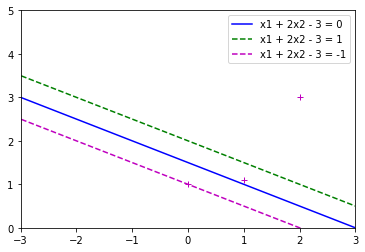

In [14]:
# Plot the points together with three decision lines.

# Suppose w1 = 1, w2 = 2, and b = -3, draw the above
# three lines on a graph.
w1, w2, b = 1, 2, -3
x1_coordinates = np.array([-5, 5])

# w1 * x1 + w2 * x2 + b = 0
x2_coordinates = (-w1 * x1_coordinates - b) / w2
plt.plot(x1_coordinates, x2_coordinates, 'b-', label="x1 + 2x2 - 3 = 0")

# w1 * x1 + w2 *x2 + b = 1
x2_coordinates_1 = (-w1 * x1_coordinates - b + 1) / w2
plt.plot(x1_coordinates, x2_coordinates_1, 'g--', label="x1 + 2x2 - 3 = 1")

# w1 * x1 + w2 *x2 + b = -1
x2_coordinates_1 = (-w1 * x1_coordinates - b - 1) / w2
plt.plot(x1_coordinates, x2_coordinates_1, 'm--', label="x1 + 2x2 - 3 = -1")

# Plot the above three points
x1 = [0, 2, 1]
x2 = [1, 3, 1.1]
plt.plot(x1, x2, 'm+')

plt.xlim([-3, 3])
plt.ylim([0, 5])
plt.legend()

## Linear SVM: Cost Function
In order to understand how to measure the performance of an SVM model, Let's first explore how the magnitude of parameters affects the margin.

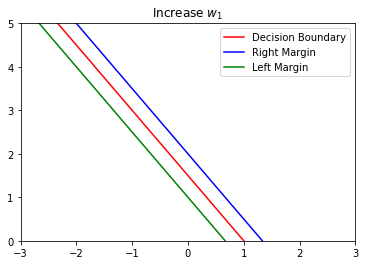

In [16]:
# In the previous model, increase w1 from 1 to 3,
# and plot the new decision margin.
# lines are: 2 * x1 + 2 * x2 - 3 = (0, 1, -1)

w1, w2, b = 3, 2, -3
x1_coordinates = np.array([-5, 5])
# plot w1 * x1 + w2 * x2 + b = 0
x2_coordinates = (-w1/w2) * x1_coordinates - b / w2
plt.plot(x1_coordinates, x2_coordinates, 'r', label="Decision Boundary")

# plot w1 * x1 + w2 *x2 + b = 1
x2_coordinates = (-w1 * x1_coordinates - b + 1) / w2
plt.plot(x1_coordinates, x2_coordinates, 'b', label="Right Margin")

# plot w1 * x1 + w2 *x2 + b = -1
x2_coordinates = (-w1 * x1_coordinates - b - 1) / w2
plt.plot(x1_coordinates, x2_coordinates, 'g', label="Left Margin")

plt.title(r"Increase $w_1$")
plt.xlim([-3, 3])
plt.ylim([0, 5])
plt.legend()

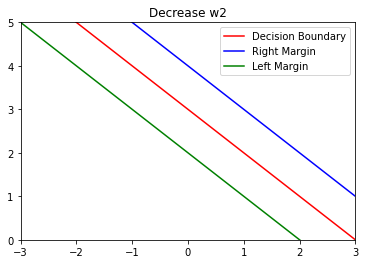

In [17]:
# Decrease w2 from 2 to 1 from the original model,
# and plot the new decision margin.

w1, w2, b = 1, 1, -3
x1_coordinates = np.array([-5, 5])

# plot w1 * x1 + w2 * x2 + b = 0
x2_coordinates = (-w1/w2) * x1_coordinates - b / w2
plt.plot(x1_coordinates, x2_coordinates, 'r', label="Decision Boundary")

# plot w1 * x1 + w2 *x2 + b = 1
x2_coordinates = (-w1 * x1_coordinates - b + 1) / w2
plt.plot(x1_coordinates, x2_coordinates, 'b', label="Right Margin")

# plot w1 * x1 + w2 *x2 + b = -1
x2_coordinates = (-w1 * x1_coordinates - b - 1) / w2
plt.plot(x1_coordinates, x2_coordinates, 'g', label="Left Margin")


plt.title(r"Decrease w2")
plt.xlim([-3, 3])
plt.ylim([0, 5])
plt.legend()

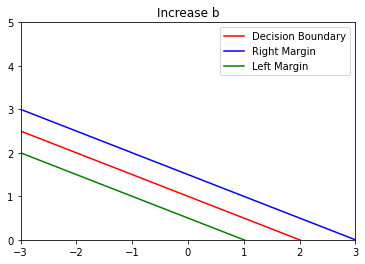

In [18]:
# Change b from -3 to -2 from the original model,
# and plot the new decision margin

w1, w2, b = 1, 2, -2
x1_coordinates = np.array([-5, 5])

# plot w1 * x1 + w2 * x2 + b = 0
x2_coordinates = (-w1/w2) * x1_coordinates - b / w2
plt.plot(x1_coordinates, x2_coordinates, 'r', label="Decision Boundary")

# plot w1 * x1 + w2 *x2 + b = 1
x2_coordinates = (-w1 * x1_coordinates - b + 1) / w2
plt.plot(x1_coordinates, x2_coordinates, 'b', label="Right Margin")

# plot w1 * x1 + w2 *x2 + b = -1
x2_coordinates = (-w1 * x1_coordinates - b - 1) / w2
plt.plot(x1_coordinates, x2_coordinates, 'g', label="Left Margin")


plt.title(r"Increase b")
plt.xlim([-3, 3])
plt.ylim([0, 5])
plt.legend()

**How does each parameter affect the width of decision margin?**
- smaller w_1 -> wider gap; larger w_1 -> narrower gap.
- smaller w_2 -> wider gap; larger w_2 -> narrower gap.
- b does not affect the width of the gap.

### Cost Function
- Cost function should give a large value if the gap is narrow, and gives a small value if the gap is wide.
- Cost function $= w_1^2 + w_2^2$, subject to no point is placed inside the gap.
- If a point is inside the gap, then $w_1  x_1 + w_2  x_2 + b$ will be less than 1 and greater than -1.
- The above property can be tranlated into $y(w_1x_1 + w_2x_2 + b) > 1$.
- The choice of cost function: $J(w_1, w_2, b) = w_1^2 + w_2^2$, subject to $y(w_1x_1 + w_2x_2 + b) > 1$ for all training instances.

## Drawbacks of Hard Margin SVM
If we strictly impose that all instances be off the street and on the correct side, the model can only be applied to models that are linearly separable. Moreover, it will be very sensitive to outliers. The above figure illustrates how badly one outlier may affect the model. 

<img src="https://github.com/ch00226855/CMP464-788-Spring2019/raw/master/Data/SVM3.png">

To avoid these issues, it is preferable to use a more flexible model. The objective is to find a good balance between keeping the street as wide as possible and limiting the margin violations. This is called *soft margin classification*.

## Task 2: Linear SVM with Soft Margin
- Each data example has two features: $x_1$ and $x_2$.
- Binary classification: target value $y = 1$ means that the instance belongs to "class 1", $y = -1$ means that the instance belongs to "class -1".
- Classes are **mostly** linearly separable: **with a few exceptions**, the two classes can be separrated with a straight line.
- The goal is to find a straight line that best separates the two classes. **Mis-classifications are allowed, but each mis-classification will add a cost to the model.**
- The objective function takes into account both **the magnitude of w's (how wide the gap is) and the degree of margin violations**.

<img src="https://github.com/ch00226855/CMP464-788-Spring2019/raw/master/Data/SVM4.jpg" width="600">

### Cost Function

$J(w_1, w_2, b)$ 
$= \frac{1}{2}(w_1^2+w_2^2) + C
\sum_{i=1}^m\max(0, 1-y^{(i)}(w_1x_1^{(i)}+w_2x_2^{(i)}+b))$

- The first sum in the cost function will push the model to have small weights, leading to a larger margin.
- The second sum computes the total of all margin violations. An instance's margin violation is equal to 0 if it is located off the street and on the correct side, or else it is proportional to the distance to the correct side of the street.
- Minimizing this term ensures that the model makes the margin violations as small and as few as possible.

### Hinge loss function
The function $\max(0, 1-t)$ used in the above cost function is called the *hinge loss* function. 
- It is equal to 0 when $t\ge 1$. 
- Its derivative (slope) is equal to 0 if $t>1$.
- Its derivative (slope) is equal to -1 if $t<1$.
- It is a convex function.

In [ ]:
# Exercise: Plot the graph of the hinge function
# h(t) = max(0, 1 - t) 



### Advantages of Soft Margin SVM
- The dataset does not have to be linearly separable.
- Outliers does not affect the model too much.
- The cost function is convex and it has no constraints, thus gradient descent can be applied to its minimization.

## Improving Linear SVM
- Feature scaling: are all features distributed similarly?
- $C$: how much does penalty matter?
- Class weights: are all classes equally important?
- Multiple classes: One vs. One, or One vs. Rest?
- **Kernel SVM**: Allow non-linear decision boundaries